<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: reto del fin de semana

El reto de esta semana es implementar el algoritmo de Singular Value Decomposition para comprimir una imagen. Podéis guiaros por lo visto en las clases y os recomiendo también esta web:

https://timbaumann.info/svd-image-compression-demo/

## SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.datasets`
- La implementación del algoritmo en `scipy.linalg`: https://docs.scipy.org/doc/scipy-1.14.0/reference/generated/scipy.linalg.svd.html
- La librería `matplotlib`para las gráficas
- El error SSE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

In [ ]:
!pip install pooch

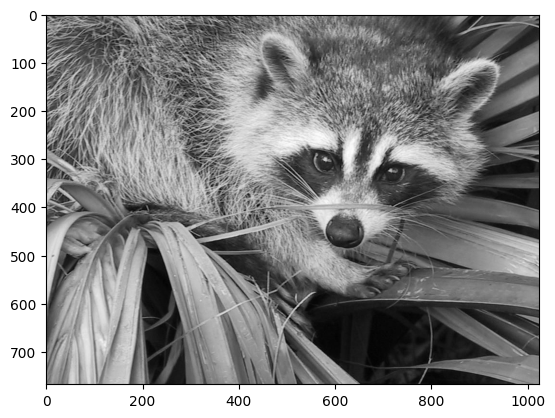

In [5]:
import matplotlib.pyplot as plt
from scipy import misc, datasets
%matplotlib inline

# Load image
A = datasets.face(gray=True)

plt.imshow(A, cmap=plt.cm.gray)

In [3]:
A

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [4]:
type(A)

numpy.ndarray

Las siguientes funciones te ayudarán a llegar a la solución final:

### 1. Implementa la función para el SSE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [1]:
import numpy as np

def sse_score(X, X_hat):
    # TODO define el error
    valor_x_elemento = 0
    total = 0
    # recorremos los elementos del array
    for i in range(len(X)):
        # recorremos los elementos del array (segundo)
        for index in range(0,len(X[i])):
            # la ubicación es X[indice del array general][indice el array dentro del array]
            valor = (X[i][index]-X_hat[i][index])**2
            total += valor            
    return total
    
X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)

0.09879999999999997


### 2. Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [7]:
import numpy as np
from scipy.linalg import svd

def svd_propia(X):
    # TODO Define la función
    U, s, Vt = svd(X, full_matrices=False)
    S = np.diag(s)
    
    return U, S, Vt # S es una matriz diagonal

X = np.array([[1, 2], [3, 4]])
U, S, Vt = svd(X)  
print(U)
print(S)
print(Vt)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[5.4649857  0.36596619]
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


### 3. Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [8]:
def reconstruction(U, S, Vt):
    # TODO Define la función
    X_hat = U @ S @ Vt

    return X_hat

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [9]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715305057493961e-15


### 4. Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [11]:
### TODO: Función que recibe una imagen A y devuelve la imagen comprimida
### Tiene como entrada A y el número de componentes para realizar la reducción de dimensionalidad
### Devuelve la imagen comprimidad y el error de reconstrucción

def image_compression(A, n_comp):
    # TODO 1: Aplicar SVD (usando la función que hemos creado)
    U, S, Vt = svd_propia(A)
    
    # TODO 2: Reconstruir usando solo el número de componentes n_comp (usando la función que hemos creado)
    A_hat = reconstruction(U[:,:n_comp], S[:n_comp,:n_comp], Vt[:n_comp,:])
    
    # TODO 3: Calcular el error
    sse = sse_score(A, A_hat)

    return A_hat, sse # A_hat es la matriz comprimida y sse es su error respecto de A

#racoon = misc.face(gray=True)
racoon = datasets.face(gray=True)
racoon_hat, sse = image_compression(racoon, n_comp=50)

### 5. Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

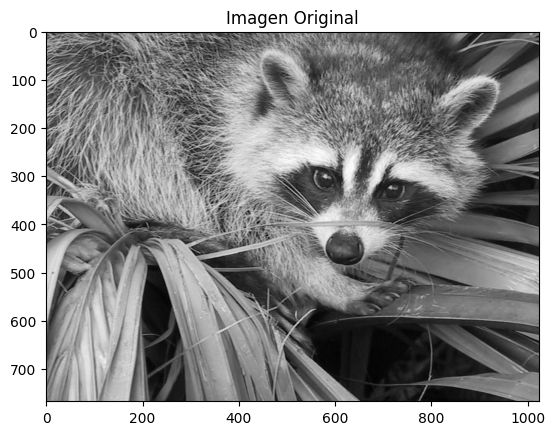

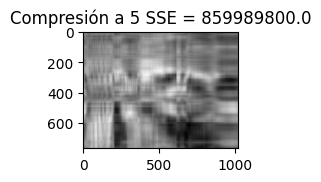

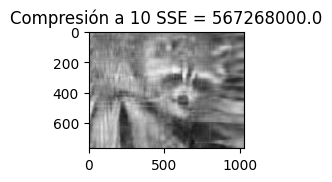

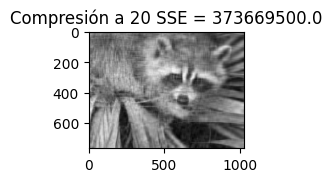

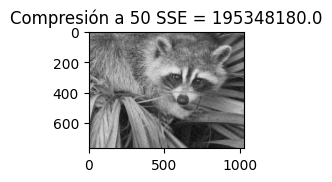

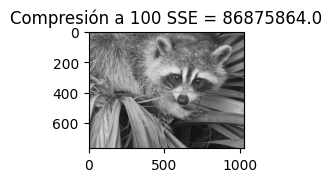

In [13]:
import matplotlib.pyplot as plt
# TODO Dibuja las graficas
A = datasets.face(gray=True)
plt.imshow(A, cmap=plt.cm.gray)
plt.title('Imagen Original')
plt.show()

for i in (5,10,20,50,100):
    
    # 1 Crear gráfica con plt.figure()
    plt.figure(figsize=(2, 2))

    # 2 Elegir un n_comp y aplicar la función image_compression()
    A_hat, sse = image_compression(A, i)

    # 3 Usar plt.imshow(A_hat, cmap=plt.cm.gray), donde A_hat va a ser la matriz comprimida resultante del paso anterior
    plt.imshow(A_hat, cmap=plt.cm.gray)

    # 4 Añadir un título a la gráfica
    plt.title('Compresión a ' + str(i) + ' SSE = '+ str(sse))

    plt.show()
# Repetir para distintas compresiones (distinto n_comp)